<a href="https://colab.research.google.com/github/rbauza7/Tarea-2-Modelos-No-Supervisados/blob/main/Tarea2finalRBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 2: Modelos No Supervisados**

**Roberto Bauza Fermin CC 0962108650**

**Propósito:** Introducir a los estudiantes a técnicas de agrupamiento y reducción de dimensionalidad.

**Objetivos de la Tarea 2**
1. Aplicar técnicas de agrupamiento (K-Means, DBSCAN, jerárquico).
2. Usar reducción de dimensionalidad (PCA, t-SNE).
3. Evaluar la calidad de los clusters generados.

**Preparando el ambiente de colab para trabajar**

In [1]:
# Instalar R
!apt-get install -y r-base
# Instalar IRKernel
!R -e "install.packages('IRkernel'); IRkernel::installspec(user = FALSE)"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('IRkernel'); IRkernel::installspec(user = FALSE)
Installing package into ‘/usr/local

**Librerias necesarias**

In [1]:
install.packages("cluster")
install.packages("factoextra")
install.packages("mclust")
install.packages("dbscan")
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Cargando el archivo abolen de GitHub**

In [2]:
# Leer el archivo directamente desde GitHub
url <- "https://raw.githubusercontent.com/rbauza7/Tarea-2-Modelos-No-Supervisados/main/abalone.data"
abalone <- read.csv(url, header = FALSE)

# Asignar nombres a las columnas
colnames(abalone) <- c("Sex", "Length", "Diameter", "Height",
                       "WholeWeight", "ShuckedWeight",
                       "VisceraWeight", "ShellWeight", "Rings")

# Explorar el dataset
head(abalone)
summary(abalone)
str(abalone)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
3,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
4,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
5,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
6,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


     Sex                Length         Diameter          Height      
 Length:4177        Min.   :0.075   Min.   :0.0550   Min.   :0.0000  
 Class :character   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150  
 Mode  :character   Median :0.545   Median :0.4250   Median :0.1400  
                    Mean   :0.524   Mean   :0.4079   Mean   :0.1395  
                    3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650  
                    Max.   :0.815   Max.   :0.6500   Max.   :1.1300  
  WholeWeight     ShuckedWeight    VisceraWeight     ShellWeight    
 Min.   :0.0020   Min.   :0.0010   Min.   :0.0005   Min.   :0.0015  
 1st Qu.:0.4415   1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300  
 Median :0.7995   Median :0.3360   Median :0.1710   Median :0.2340  
 Mean   :0.8287   Mean   :0.3594   Mean   :0.1806   Mean   :0.2388  
 3rd Qu.:1.1530   3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290  
 Max.   :2.8255   Max.   :1.4880   Max.   :0.7600   Max.   :1.0050  
     Rings       
 Min.   :

'data.frame':	4177 obs. of  9 variables:
 $ Sex          : chr  "M" "M" "F" "M" ...
 $ Length       : num  0.455 0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 ...
 $ Diameter     : num  0.365 0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 ...
 $ Height       : num  0.095 0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 ...
 $ WholeWeight  : num  0.514 0.226 0.677 0.516 0.205 ...
 $ ShuckedWeight: num  0.2245 0.0995 0.2565 0.2155 0.0895 ...
 $ VisceraWeight: num  0.101 0.0485 0.1415 0.114 0.0395 ...
 $ ShellWeight  : num  0.15 0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 ...
 $ Rings        : int  15 7 9 10 7 8 20 16 9 19 ...


**Análisis exploratorio de los datos**

valores únicos en la variable categórica

In [3]:
unique(abalone$Sex)


[1] "M" "F" "I"

descriptivas para las variables numéricas

In [4]:
summary(abalone[, -1])  # Excluir la variable `Sex`


     Length         Diameter          Height        WholeWeight    
 Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
 Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
 3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
 Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
 ShuckedWeight    VisceraWeight     ShellWeight         Rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   : 9.934  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.0050   Max.   :29.000  

distribuciones de las variables numéricas:

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


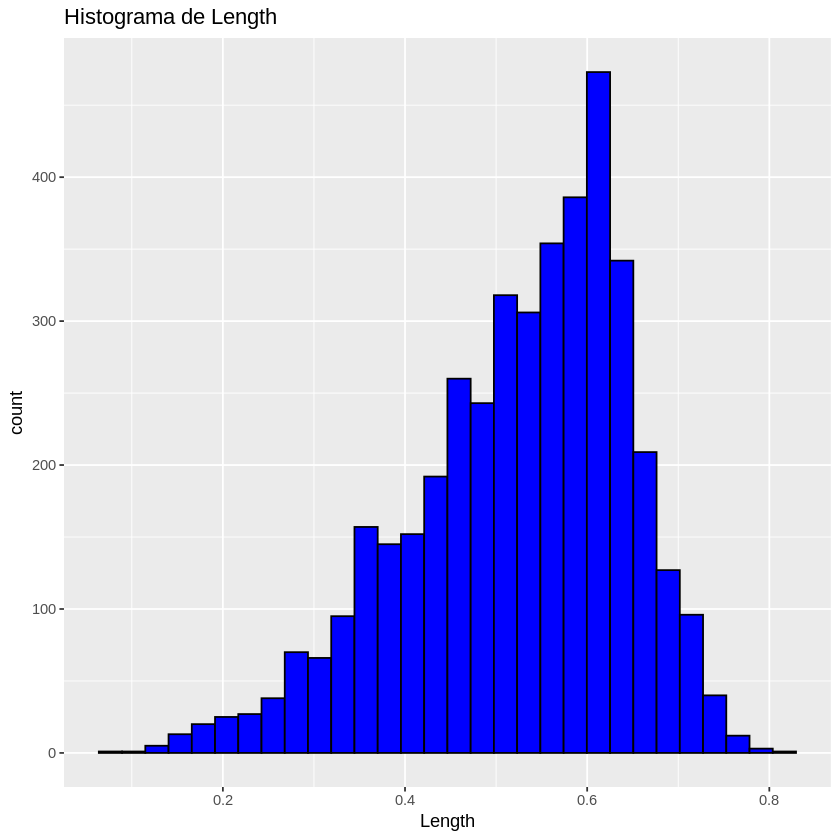

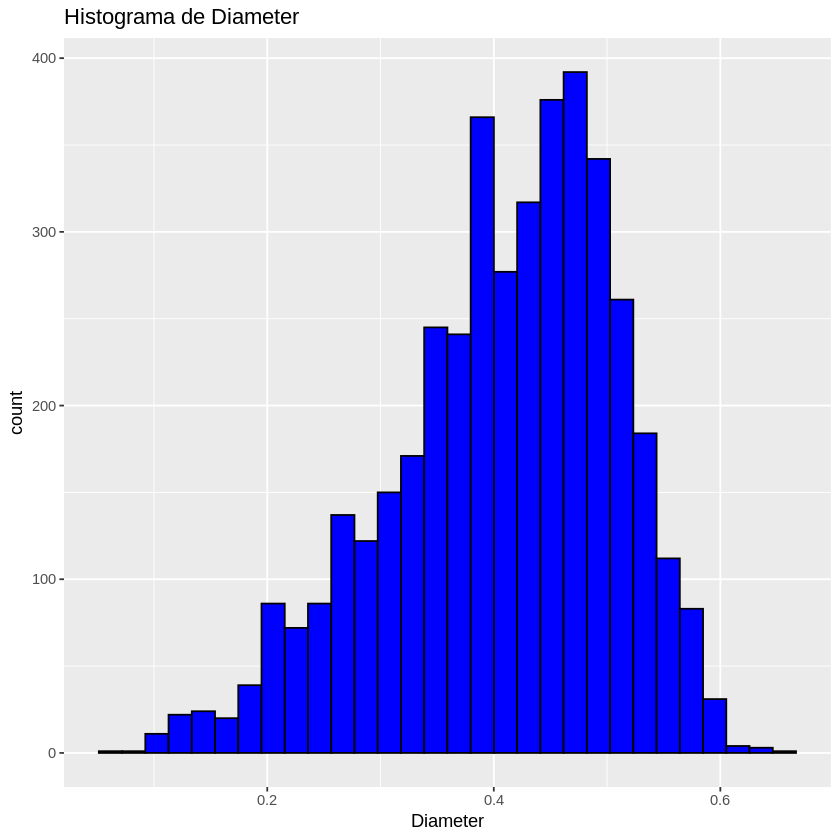

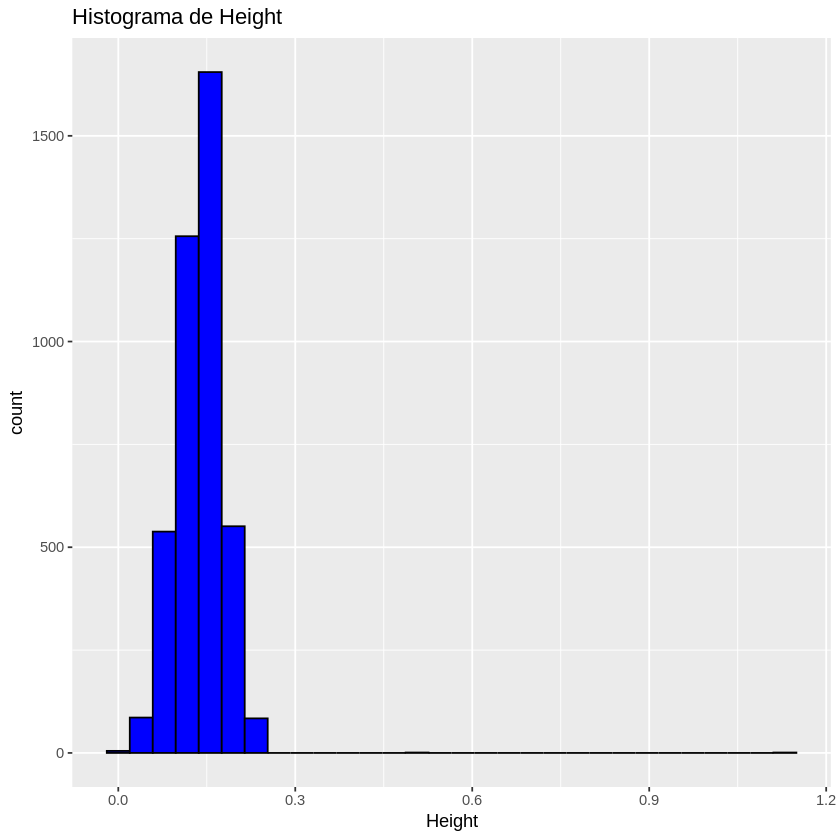

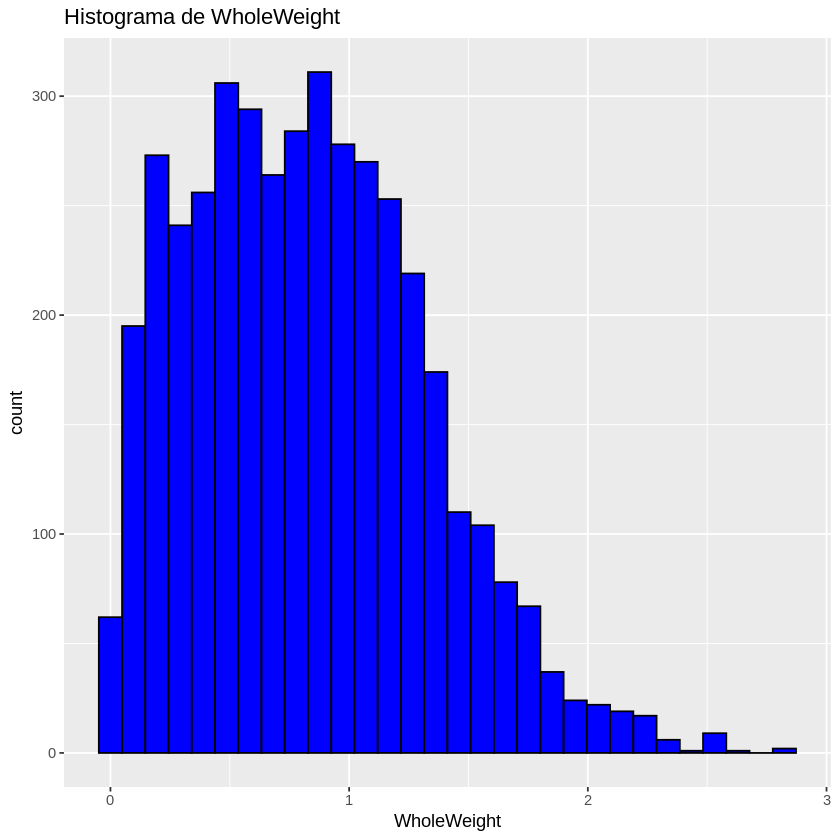

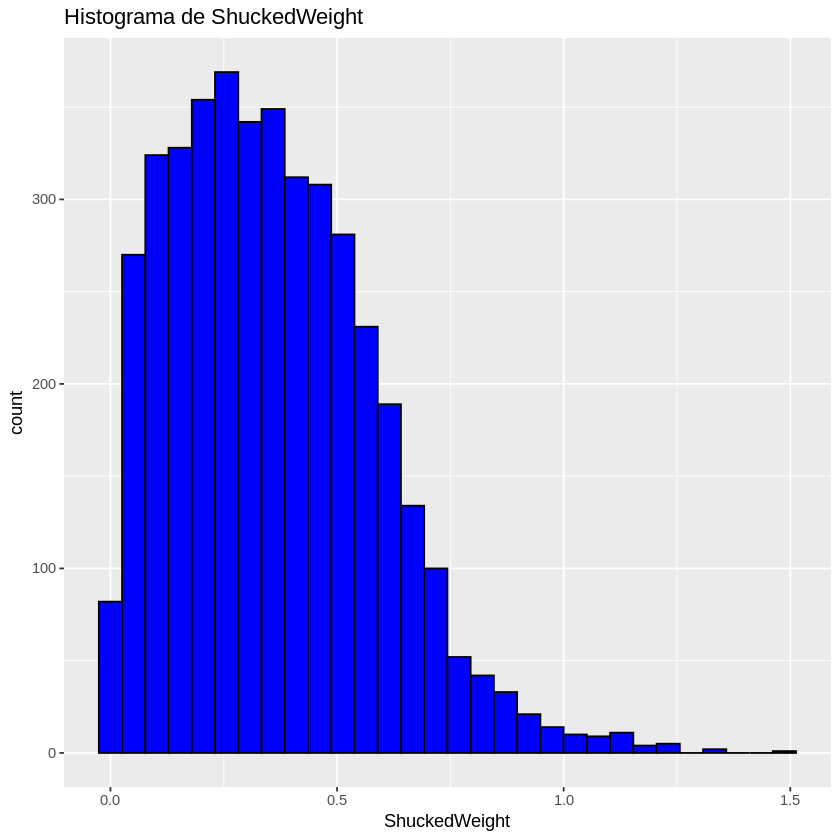

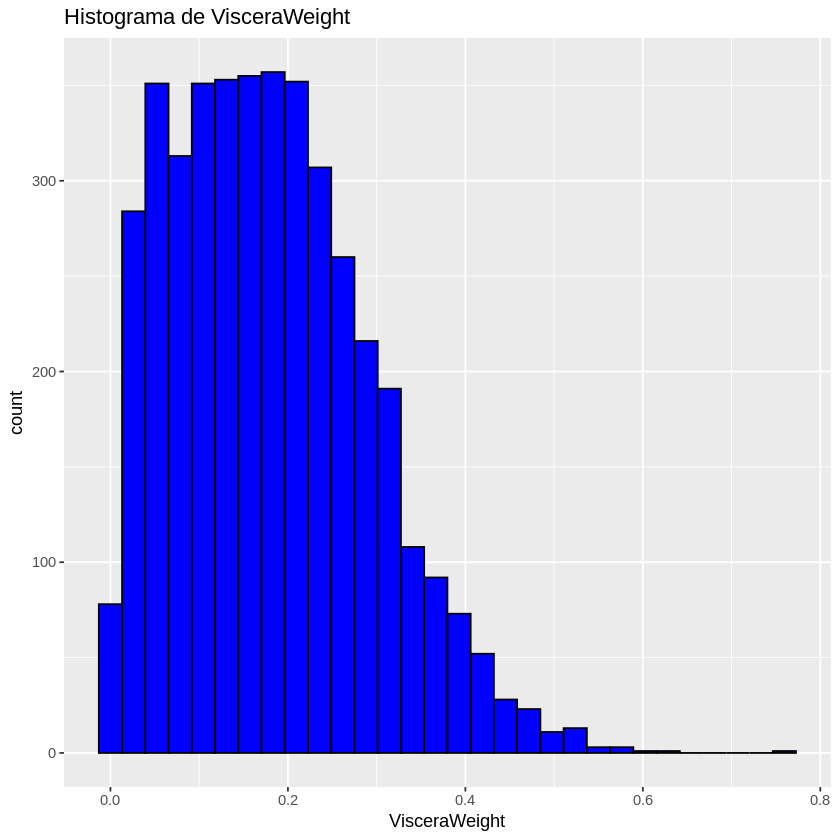

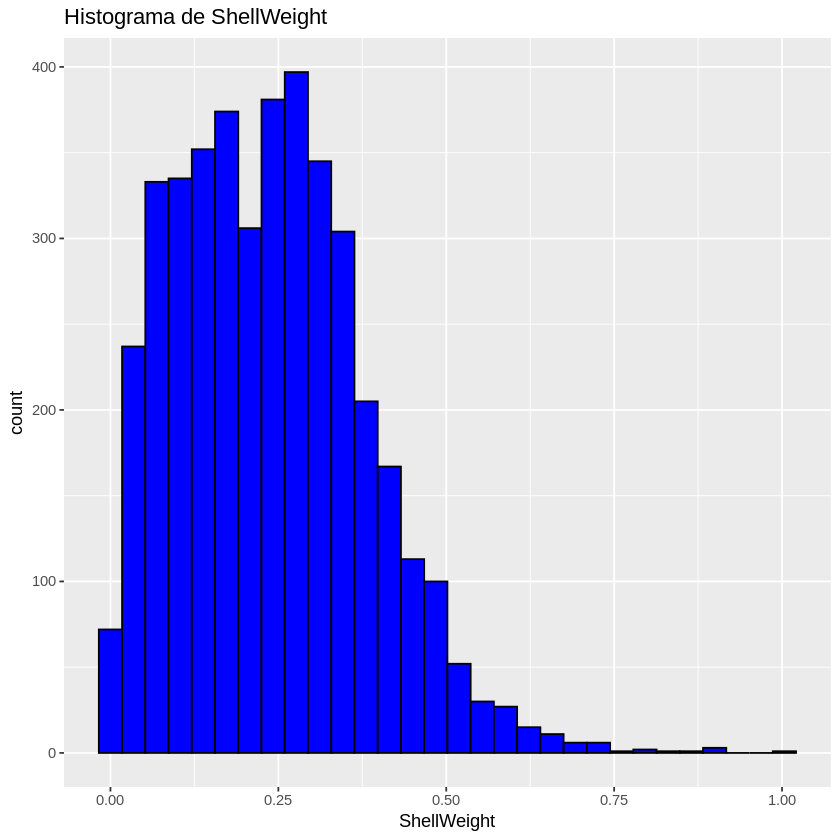

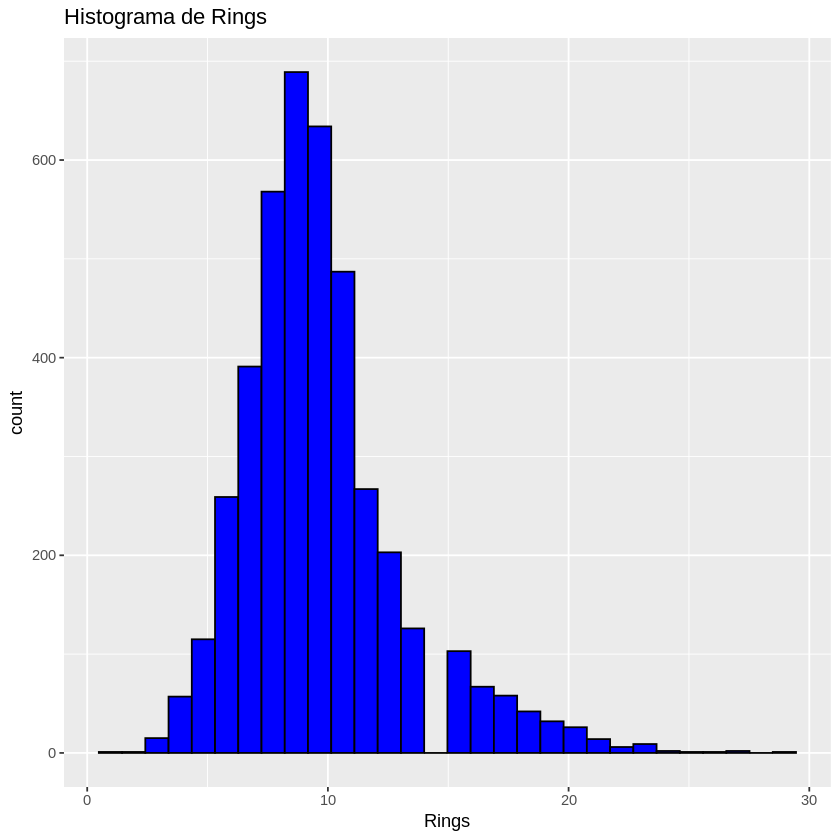

In [5]:
library(ggplot2)

# Crear histogramas para las variables numéricas
num_vars <- colnames(abalone)[2:9]
for (var in num_vars) {
  print(ggplot(abalone, aes_string(x = var)) +
    geom_histogram(bins = 30, fill = "blue", color = "black") +
    ggtitle(paste("Histograma de", var)))
}


correlaciones entre variables numéricas:

In [6]:
cor_matrix <- cor(abalone[, -c(1, 9)])  # Excluir `Sex` y `Rings`
cor_matrix


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
Length,1.0000000,0.9868116,0.8275536,0.9252612,0.8979137,0.9030177,0.8977056
Diameter,0.9868116,1.0000000,0.8336837,0.9254521,0.8931625,0.8997244,0.9053298
Height,0.8275536,0.8336837,1.0000000,0.8192208,0.7749723,0.7983193,0.8173380
WholeWeight,0.9252612,0.9254521,0.8192208,1.0000000,0.9694055,0.9663751,0.9553554
ShuckedWeight,0.8979137,0.8931625,0.7749723,0.9694055,1.0000000,0.9319613,0.8826171
VisceraWeight,0.9030177,0.8997244,0.7983193,0.9663751,0.9319613,1.0000000,0.9076563
ShellWeight,0.8977056,0.9053298,0.8173380,0.9553554,0.8826171,0.9076563,1.0000000


Mapa de Calor de las Correlaciones

In [7]:
install.packages("pheatmap")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



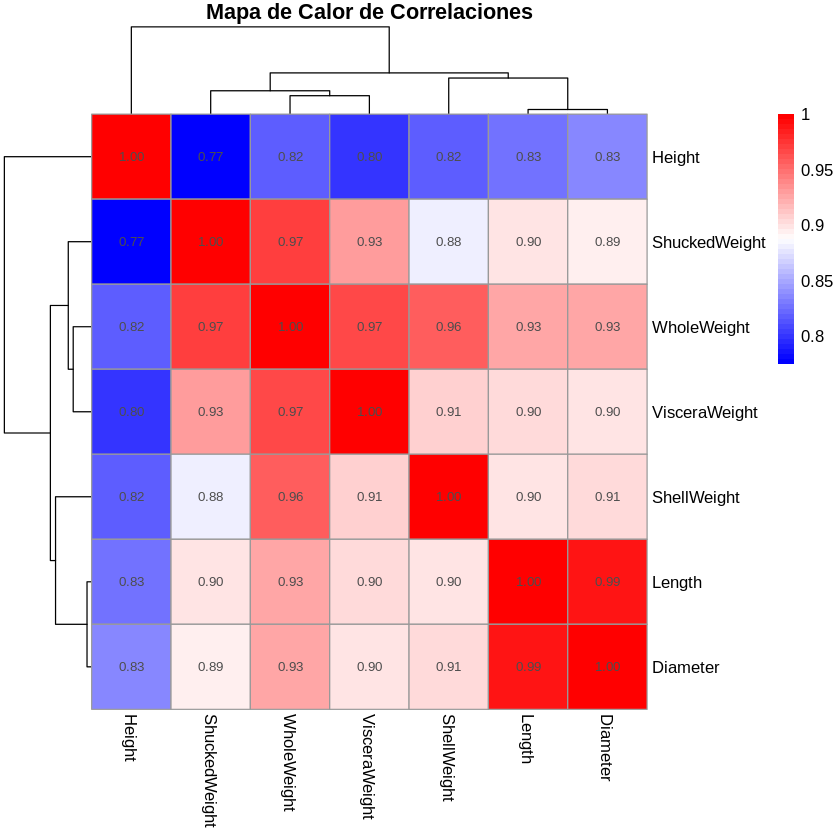

In [8]:
library(pheatmap)

# Calcular la matriz de correlación (excluir `Sex` y `Rings`)
cor_matrix <- cor(abalone[, -c(1, 9)])

# Crear el mapa de calor
pheatmap(cor_matrix,
         display_numbers = TRUE,  # Mostrar los valores de las correlaciones
         color = colorRampPalette(c("blue", "white", "red"))(50),
         main = "Mapa de Calor de Correlaciones")


**Observaciones generales:** Se esta usando el código pheatmap. El mapa de calor confirma que hay fuertes relaciones entre las variables relacionadas con tamaño y peso, lo cual será útil para el análisis de agrupamiento. Las correlaciones generalmente se calculan entre variables predictoras. He excluido las variables categóricas.